<a href="https://colab.research.google.com/github/Wamgleb/KalinchukGlebZPI-zp01Lab1PIIS/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Імпорт бібліотек та класів
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Підготовка датасетів від Microsoft
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteANID6U/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# Функція для зміни розміру зображення. Вона потрібна для уніфікації зобаражень
# Також це пришвидчить час обробки нейромережею фото 
SIZE = (224, 224)

def resize_image(img, label):
	img = tf.cast(img, tf.float32)
	img = tf.image.resize(img, SIZE)
	img /= 255.0
	return img, label

In [ ]:
# Зменшуемо усі зображення з датасету
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [ ]:
# Створюжмо основний слой моделі
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE[0], SIZE[1], 3), include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Створення моделі нейромержі
model = tf.keras.Sequential([
	base_layers,
	GlobalAveragePooling2D(),
	Dropout(0.2),
	Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Навчання
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 4935s 3s/step - loss: 0.1672 - accuracy: 0.9286


In [ ]:
# Функція для завантаження зображень
x = files.upload()

for i in x:
  my_input = [].append(i)
  print(my_input)

Saving 8.jpg to 8 (3).jpg
Saving 7.jpg to 7 (4).jpg
Saving 9.jpg to 9 (4).jpg
Saving 1.jpg to 1 (4).jpg
Saving 3.jpg to 3 (4).jpg
Saving 5.jpg to 5 (4).jpg
Saving 2.jpg to 2 (4).jpg
Saving 4.jpg to 4 (4).jpg
Saving 10.jpg to 10 (4).jpg
Saving 6.jpg to 6 (4).jpg
None
None
None
None
None
None
None
None
None
None


1/1 [==============================] - 0s 68ms/step


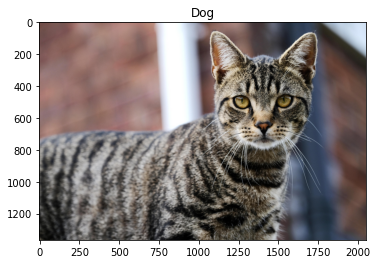

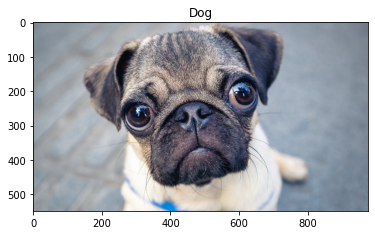

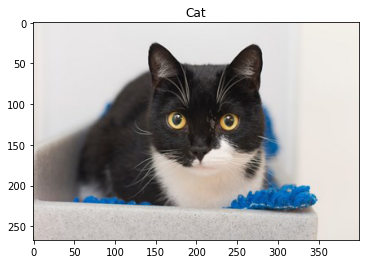

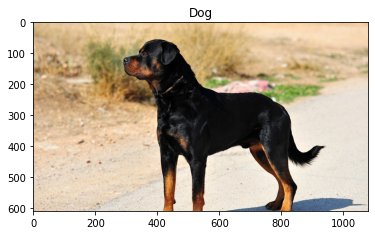

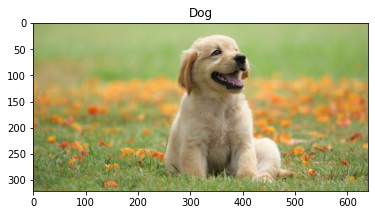

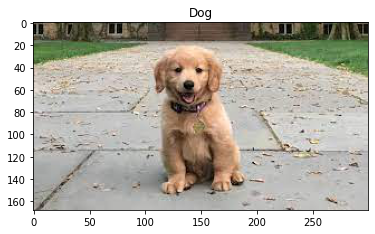

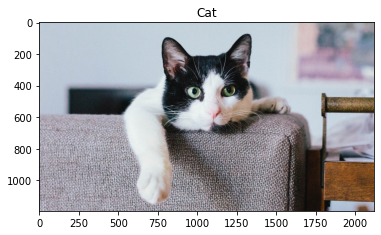

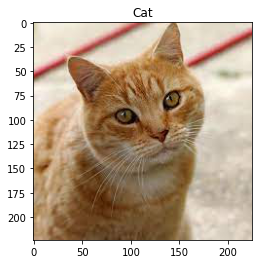

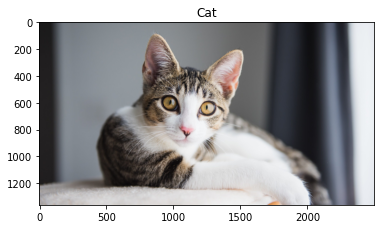

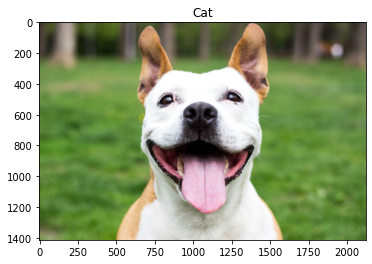

In [ ]:
# тут ми вказуємо назві завантажених фото 
images = ["1.jpg", "2.jpg", "3.jpg", "4.jpg", "5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg", "10.jpg"]

# Перетворюємо усі зображення и визначаємо об'єкт на фото
for i in images:
	img = load_img(i)
	img_array = img_to_array(img)
	img_resized, _ = resize_image(img_array, _)
	img_expended = np.expand_dims(img_resized, axis=0)
	prediction = model.predict(img_expended)
	plt.figure()
	plt.imshow(img)
	label = 'Dog' if prediction > 10 else 'Cat'
	plt.title('{}'.format(label))